In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\JN\apartment_cost_list.csv")

In [4]:
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...


In [5]:
df.dropna()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description


In [6]:
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...


In [7]:
df.tail()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
19608,122923649,MANHATTAN,315,WEST 33RD STREET,757,22,1013552,A2,104,NaN,03/21/2017,$60000.00,0,NaN,NaN,0,C6-4,RENOVATION OF APARTMENTS 8N &amp; 12A. ARCHITE...
19609,121090112,MANHATTAN,110,DUANE STREET,150,22,1001645,A2,101,NaN,07/17/2012,$40000.00,0,NaN,NaN,0,C6-2A,APARTMENT RENVOATION AT APT #4R. DEMOLISH AND ...
19610,102937342,MANHATTAN,166,BANK STREET,638,4,1078335,A2,102,NaN,02/07/2001,$80000.00,0,NaN,NaN,0,C6-2,Interior renovation of an existing apartment. ...
19611,200838558,BRONX,2762,KINGSBRIDGE TERRACE,3253,90,2015521,A2,208,NaN,NaN,$40000.00,0,NaN,NaN,0,R6,Proposed to renovate existing apartments. No c...
19612,301429158,BROOKLYN,802,HOWARD AVENUE,3565,42,3081797,A2,316,NaN,NaN,$60000.00,0,NaN,NaN,0,R6,PROPOSE RENOVATE EXISTING CLASS 'A' APARTMENT ...


In [8]:
df.dtypes

Job #                      int64
Borough                   object
House #                   object
Street Name               object
Block                      int64
Lot                        int64
Bin #                      int64
Job Type                  object
Community - Board          int64
Curb Cut                  object
Fully Permitted           object
Initial Cost              object
Proposed Zoning Sqft       int64
Horizontal Enlrgmt        object
Vertical Enlrgmt          object
Enlargement SQ Footage     int64
Zoning Dist1              object
Job Description           object
dtype: object

In [9]:
df2=df.drop(columns=["Horizontal Enlrgmt", "Vertical Enlrgmt", "Enlargement SQ Footage", "Proposed Zoning Sqft"])

In [10]:
df2.dtypes

Job #                 int64
Borough              object
House #              object
Street Name          object
Block                 int64
Lot                   int64
Bin #                 int64
Job Type             object
Community - Board     int64
Curb Cut             object
Fully Permitted      object
Initial Cost         object
Zoning Dist1         object
Job Description      object
dtype: object

In [11]:
df2=df2.dropna()

In [12]:
df2.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Zoning Dist1,Job Description
180,302376596,BROOKLYN,5118,14 AVENUE,5656,45,3138390,A1,312,X,01/13/2009,$40000.00,R6,FILING ALT TYPE 1 TO CONVERT 2 APARTMENT INTO ...
592,500777126,STATEN ISLAND,115,OSBORNE AVENUE,5273,65,5067489,A1,503,X,08/08/2005,$50000.00,R3A,"APPLICATION BEING FILED TO ADD A SECOND FLOOR,..."
2178,500777126,STATEN ISLAND,115,OSBORNE AVENUE,5273,65,5067489,A1,503,X,08/08/2005,$50000.00,R3A,"APPLICATION BEING FILED TO ADD A SECOND FLOOR,..."
2594,401732611,QUEENS,76-18,69 PLACE,3706,51,4530846,A1,405,X,12/19/2003,$480000.00,R5,GUT RENOVATION OF EXISTING MANUFACTURING BUILD...
4680,401732611,QUEENS,76-18,69 PLACE,3706,51,4530846,A1,405,X,12/19/2003,$480000.00,R5,GUT RENOVATION OF EXISTING MANUFACTURING BUILD...


In [13]:
df2=df2.drop(columns=["Zoning Dist1", "Curb Cut"])

In [14]:
df2.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Fully Permitted,Initial Cost,Job Description
180,302376596,BROOKLYN,5118,14 AVENUE,5656,45,3138390,A1,312,01/13/2009,$40000.00,FILING ALT TYPE 1 TO CONVERT 2 APARTMENT INTO ...
592,500777126,STATEN ISLAND,115,OSBORNE AVENUE,5273,65,5067489,A1,503,08/08/2005,$50000.00,"APPLICATION BEING FILED TO ADD A SECOND FLOOR,..."
2178,500777126,STATEN ISLAND,115,OSBORNE AVENUE,5273,65,5067489,A1,503,08/08/2005,$50000.00,"APPLICATION BEING FILED TO ADD A SECOND FLOOR,..."
2594,401732611,QUEENS,76-18,69 PLACE,3706,51,4530846,A1,405,12/19/2003,$480000.00,GUT RENOVATION OF EXISTING MANUFACTURING BUILD...
4680,401732611,QUEENS,76-18,69 PLACE,3706,51,4530846,A1,405,12/19/2003,$480000.00,GUT RENOVATION OF EXISTING MANUFACTURING BUILD...


Text(0.5, 1.0, 'Distribution of Apartment Initial Prices')

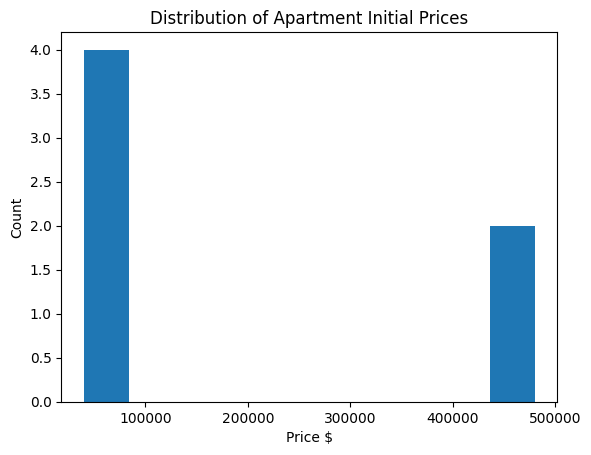

In [47]:
plt.hist(df2["Initial Cost"])

plt.xlabel("Price $")
plt.ylabel("Count")

plt.title("Distribution of Apartment Initial Prices")

Text(0.5, 1.0, 'Distribution of Apartment Borough')

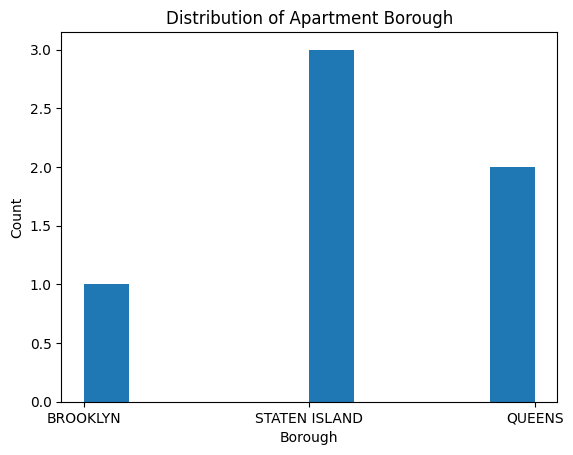

In [48]:
plt.hist(df2["Borough"])

plt.xlabel("Borough")
plt.ylabel("Count")

plt.title("Distribution of Apartment Borough")

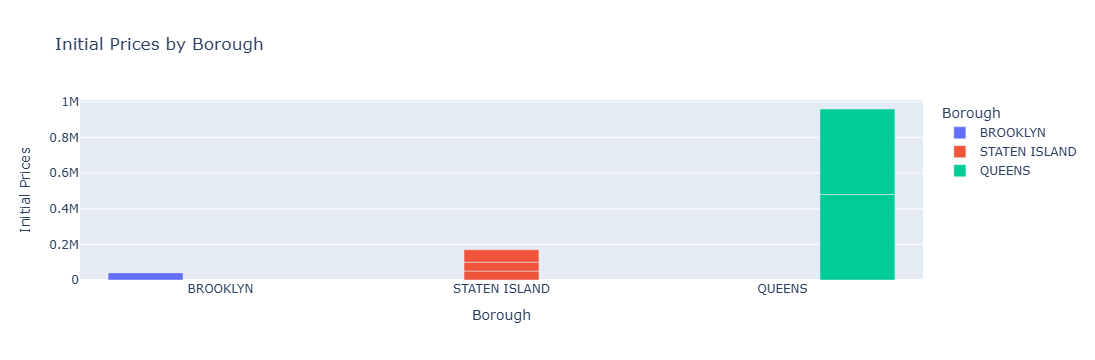

In [38]:
fig = px.bar(
    df2,
    x="Borough",
    y="Initial Cost",
    title="Initial Prices by Borough",
    labels={"Initial Cost": "Initial Prices", "Borough": "Borough"},
    color="Borough",  # Optional: Adds color by Borough
    barmode="group",  # Can be adjusted for stacked/grouped bars
)
fig.show()

In [18]:
df2['Fully Permitted'] = pd.to_datetime(df2['Fully Permitted'])

In [19]:
df2['Initial Cost'] = df2['Initial Cost'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning:

invalid escape sequence '\$'

<>:1: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\HP\AppData\Local\Temp\ipykernel_19496\3707131125.py:1: SyntaxWarning:

invalid escape sequence '\$'



In [20]:
df2['Year'] = df2['Fully Permitted'].dt.year
df2['Month'] = df2['Fully Permitted'].dt.to_period('M')

In [21]:
df2.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Fully Permitted,Initial Cost,Job Description,Year,Month
180,302376596,BROOKLYN,5118,14 AVENUE,5656,45,3138390,A1,312,2009-01-13,40000.0,FILING ALT TYPE 1 TO CONVERT 2 APARTMENT INTO ...,2009,2009-01
592,500777126,STATEN ISLAND,115,OSBORNE AVENUE,5273,65,5067489,A1,503,2005-08-08,50000.0,"APPLICATION BEING FILED TO ADD A SECOND FLOOR,...",2005,2005-08
2178,500777126,STATEN ISLAND,115,OSBORNE AVENUE,5273,65,5067489,A1,503,2005-08-08,50000.0,"APPLICATION BEING FILED TO ADD A SECOND FLOOR,...",2005,2005-08
2594,401732611,QUEENS,76-18,69 PLACE,3706,51,4530846,A1,405,2003-12-19,480000.0,GUT RENOVATION OF EXISTING MANUFACTURING BUILD...,2003,2003-12
4680,401732611,QUEENS,76-18,69 PLACE,3706,51,4530846,A1,405,2003-12-19,480000.0,GUT RENOVATION OF EXISTING MANUFACTURING BUILD...,2003,2003-12


Text(0.5, 1.0, 'Initial cost vs Borough')

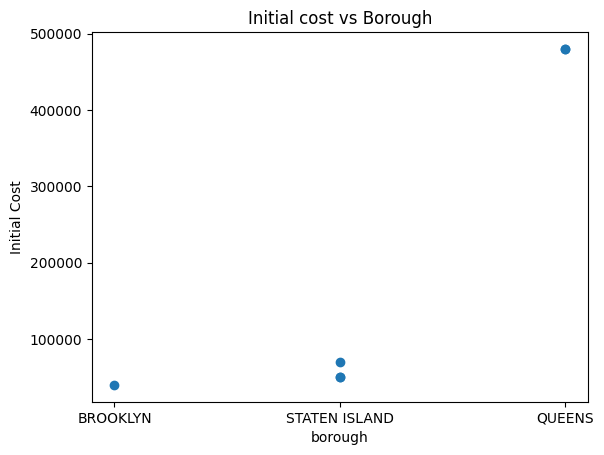

In [22]:
plt.scatter(x=df2["Borough"], y=df2["Initial Cost"])
plt.xlabel("borough")
plt.ylabel("Initial Cost")
plt.title("Initial cost vs Borough")

In [23]:
df2.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Fully Permitted,Initial Cost,Job Description,Year,Month
180,302376596,BROOKLYN,5118,14 AVENUE,5656,45,3138390,A1,312,2009-01-13,40000.0,FILING ALT TYPE 1 TO CONVERT 2 APARTMENT INTO ...,2009,2009-01
592,500777126,STATEN ISLAND,115,OSBORNE AVENUE,5273,65,5067489,A1,503,2005-08-08,50000.0,"APPLICATION BEING FILED TO ADD A SECOND FLOOR,...",2005,2005-08
2178,500777126,STATEN ISLAND,115,OSBORNE AVENUE,5273,65,5067489,A1,503,2005-08-08,50000.0,"APPLICATION BEING FILED TO ADD A SECOND FLOOR,...",2005,2005-08
2594,401732611,QUEENS,76-18,69 PLACE,3706,51,4530846,A1,405,2003-12-19,480000.0,GUT RENOVATION OF EXISTING MANUFACTURING BUILD...,2003,2003-12
4680,401732611,QUEENS,76-18,69 PLACE,3706,51,4530846,A1,405,2003-12-19,480000.0,GUT RENOVATION OF EXISTING MANUFACTURING BUILD...,2003,2003-12


In [39]:
features = ["Borough", "Job Type"]
X_train =df2[features]
target ="Initial Cost"
y_train = df2[target]

In [46]:
df2["Borough"].nunique

<bound method IndexOpsMixin.nunique of 180          BROOKLYN
592     STATEN ISLAND
2178    STATEN ISLAND
2594           QUEENS
4680           QUEENS
8714    STATEN ISLAND
Name: Borough, dtype: object>

In [25]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]* len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean InitialCost:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean InitialCost: 195000.0
Baseline MAE: 190000.0


In [26]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Borough', 'Job Type'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [27]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
X_test = pd.read_excel(r"C:\Users\HP\Downloads\test_data.xlsx")

In [29]:
X_test.head()

,Borough,Job Type
0,MANHATTAN,A2
1,MANHATTAN,A2
2,BROOKLYN,A1
3,BROOKLYN,A2
4,BROOKLYN,A1


In [30]:
y_test_pred = pd.Series(model.predict(X_test))
y_test_pred.tail()

14    119782.608696
15    199565.217391
16    199565.217391
17    199565.217391
18    119782.608696
dtype: float64

In [31]:
coefficients = model.named_steps["ridge"].coef_
feature_names = model.named_steps["onehotencoder"].get_feature_names()
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\utils.py:379: FutureWarning:

`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.



Borough_BROOKLYN         -79782.608696
Borough_STATEN ISLAND   -107173.913043
Borough_QUEENS           186956.521739
Job Type_A1                   0.000000
dtype: float64

Text(0.5, 1.0, 'feature Importance for apartment initial cost')

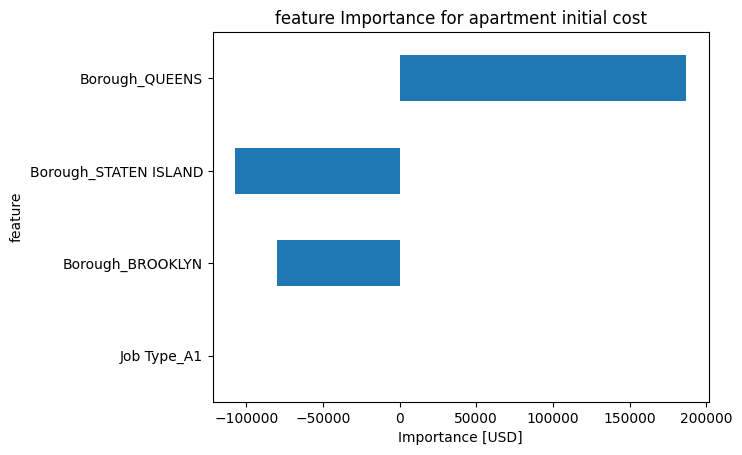

In [32]:
feat_imp.sort_values(key=abs).tail(10).plot(kind="barh")
plt.xlabel("Importance [USD]")
plt.ylabel("feature")
plt.title("feature Importance for apartment initial cost")

TypeError: unhashable type: 'numpy.ndarray'

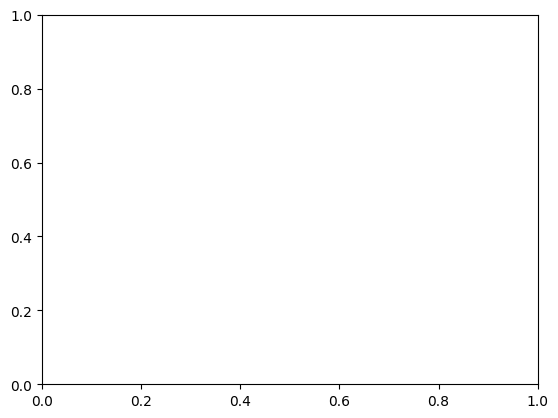

In [33]:
plt.plot(X_train.values, model.predict(X_test),color="red", label="Linear Model")
plt.scatter(X_train, y_train)
